## Topic: Natural Language Processing (NLP) on News Articles
### Capstone - Unsupervised Learning

#### Author: Will Becerra
#### Email: willbecerra@yahoo.com

#### Date: August 25, 2018

## Goal of Analysis

The dataset includes article title, publication, author, date, year, month, url and content.  The features we'll be using are 'author' and 'content', to determine if the writing styles of the various authors are readily distinguishable.

In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data

The data set is 50,000 articles from 15 American publications from Kaggle.

https://www.kaggle.com/snapcrack/all-the-news/version/4

In [3]:
df = pd.read_csv('articles1.csv')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
Unnamed: 0     50000 non-null int64
id             50000 non-null int64
title          50000 non-null object
publication    50000 non-null object
author         43694 non-null object
date           50000 non-null object
year           50000 non-null float64
month          50000 non-null float64
url            0 non-null float64
content        50000 non-null object
dtypes: float64(3), int64(2), object(5)
memory usage: 3.8+ MB


In [4]:
df.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [75]:
df.isnull().sum()

Unnamed: 0         0
id                 0
title              0
publication        0
author          6306
date               0
year               0
month              0
url            50000
content            0
dtype: int64

In [4]:
df.dropna(axis=0, subset=['author'], inplace = True)

In [4]:
df.isnull().sum()

Unnamed: 0         0
id                 0
title              0
publication        0
author             0
date               0
year               0
month              0
url            43694
content            0
dtype: int64

### Let's choose a subset of 10 authors who have each written 32 to 34 articles.

In [5]:
df['author'].value_counts()[(df['author'].value_counts()>31) & (df['author'].value_counts()<35)]

James P. Pinkerton     34
Steve Kovach           34
Jennifer Steinhauer    34
William Bigelow        33
Brett LoGiurato        33
Alexei Oreskovic       32
Sarkis Zeronian        32
Michael Barbaro        32
Frida Ghitis           32
Matt Rosoff            32
Name: author, dtype: int64

In [6]:
df_authors = df.loc[
    ((df['author'] == 'Jennifer Steinhauer') | (df['author'] == 'Steve Kovach') | \
    (df['author'] == 'James P. Pinkerton') | (df['author'] == 'William Bigelow') | \
    (df['author'] == 'Brett LoGiurato') | (df['author'] == 'Sarkis Zeronian') | \
    (df['author'] == 'Matt Rosoff') | (df['author'] == 'Frida Ghitis') | \
    (df['author'] == 'Alexei Oreskovic') | (df['author'] == 'Michael Barbaro')), \
    ['author', 'year', 'month', 'content']
]

In [9]:
df_authors.head()

,author,year,month,content
24,Jennifer Steinhauer,2017.0,1.0,WASHINGTON — The most powerful and ambitiou...
385,Michael Barbaro,2017.0,1.0,"In the waning days of his presidency, Barack O..."
420,Jennifer Steinhauer,2017.0,2.0,WASHINGTON — Donald J. Trump’s choice for...
609,Jennifer Steinhauer,2017.0,1.0,PHILADELPHIA — From the time Donald J. Trum...
776,Michael Barbaro,2017.0,6.0,"On the eve of our debut episode of “The Daily,..."


In [10]:
df_authors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 24 to 49701
Data columns (total 4 columns):
author     328 non-null object
year       328 non-null float64
month      328 non-null float64
content    328 non-null object
dtypes: float64(2), object(2)
memory usage: 12.8+ KB


## Preparing the data for use

In [7]:
df_authors['content'] = df_authors['content'].str.lower().str.replace('—', '')

In [8]:
df_authors['content'] = df_authors['content'].str.replace('"', '')

In [13]:
df_authors.head()

,author,year,month,content
24,Jennifer Steinhauer,2017.0,1.0,washington the most powerful and ambitious...
385,Michael Barbaro,2017.0,1.0,"in the waning days of his presidency, barack o..."
420,Jennifer Steinhauer,2017.0,2.0,washington donald j. trump’s choice for ...
609,Jennifer Steinhauer,2017.0,1.0,philadelphia from the time donald j. trump...
776,Michael Barbaro,2017.0,6.0,"on the eve of our debut episode of “the daily,..."


In [14]:
print(df_authors['content'].iloc[1])    

in the waning days of his presidency, barack obama is waging a final battle     not over legislation or a supreme court seat, but over how he will be remembered. in the latest episode of the   we explore what, exactly, the obama legacy will be. the president is aggressively telling his version, through a major speech broadcast on   tv, interviews and a forthcoming book. but   donald j. trump is telling a very different version, through tweets, speeches and news conferences. who’s will win out? i speak with david leonhardt, an   columnist at the new york times who chronicled the obama administration from the start, and jodi kantor, a reporter whose book, “the obamas,” was just reissued with a new preface. our   conversation explores mr. obama’s impact on race, health care, economic inequality and america’s place in the world. and we seek to answer a question historians may puzzle over for decades: just how consequential was this presidency compared with past white houses? i speak as wel

## Tokenization of the data.  

### It looks like the articles in the csv are in the format of a single line, and aren't readily segementable by paragraph, so we'll analyze by article.

In [9]:
import nltk

articles = pd.DataFrame(columns = ['content', 'author'])

for i,j in zip(df_authors.content, df_authors.author):
    line = nltk.LineTokenizer().tokenize(i)
    articles = articles.append({'content': ' '.join(line), 'author':j}, ignore_index=True)
    print(j)
    
print(articles[0:2])

Jennifer Steinhauer
Michael Barbaro
Jennifer Steinhauer
Jennifer Steinhauer
Michael Barbaro
Michael Barbaro
Michael Barbaro
Jennifer Steinhauer
Jennifer Steinhauer
Jennifer Steinhauer
Jennifer Steinhauer
Jennifer Steinhauer
Jennifer Steinhauer
Jennifer Steinhauer
Michael Barbaro
Jennifer Steinhauer
Jennifer Steinhauer
Jennifer Steinhauer
Jennifer Steinhauer
Michael Barbaro
Michael Barbaro
Michael Barbaro
Michael Barbaro
Jennifer Steinhauer
Jennifer Steinhauer
Michael Barbaro
Jennifer Steinhauer
Michael Barbaro
Michael Barbaro
Jennifer Steinhauer
Michael Barbaro
Jennifer Steinhauer
Michael Barbaro
Michael Barbaro
Michael Barbaro
Jennifer Steinhauer
Jennifer Steinhauer
Jennifer Steinhauer
Jennifer Steinhauer
Michael Barbaro
Michael Barbaro
Michael Barbaro
Jennifer Steinhauer
Jennifer Steinhauer
Jennifer Steinhauer
Michael Barbaro
Michael Barbaro
Michael Barbaro
Michael Barbaro
Jennifer Steinhauer
Jennifer Steinhauer
Michael Barbaro
Jennifer Steinhauer
Jennifer Steinhauer
Jennifer Steinha

In [10]:
articles.author = articles.author.astype('category')
articles.dtypes

content      object
author     category
dtype: object

### Let's create a categorical numerical feature to represent each of the authors.

In [11]:
articles["author_cat"] = articles["author"].cat.codes
articles.head()

,content,author,author_cat
0,washington the most powerful and ambitious...,Jennifer Steinhauer,4
1,"in the waning days of his presidency, barack o...",Michael Barbaro,6
2,washington donald j. trump’s choice for ...,Jennifer Steinhauer,4
3,philadelphia from the time donald j. trump...,Jennifer Steinhauer,4
4,"on the eve of our debut episode of “the daily,...",Michael Barbaro,6


# Latent Semantic Analysis

## Let's create vector representations of the articles.

## The first step is tf-idf.

In [12]:
import re
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test = train_test_split(articles, test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case 
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
articles_tfidf=vectorizer.fit_transform(articles.content)
print("Number of features: %d" % articles_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(articles_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of article
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per article
tfidf_by_article = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each article, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_by_article[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train.iloc[5])
print('Tf_idf vector:', tfidf_by_article[5])

Number of features: 8820
Original sentence: content         and  [yet as breitbart’s oliver lane observe...
author                                       James P. Pinkerton
author_cat                                                    3
Name: 111, dtype: object
Tf_idf vector: {'undertaking': 0.03297770624961811, 'tesla': 0.030020967571310217, 'driverless': 0.03297770624961811, 'vehicles': 0.05793132371757984, 'dining': 0.031312557378653065, 'adapt': 0.03297770624961811, 'beats': 0.030020967571310217, 'ventures': 0.03297770624961811, 'occupation': 0.03297770624961811, 'cuba': 0.031312557378653065, 'rollins': 0.03297770624961811, 'driveway': 0.03297770624961811, '241': 0.03297770624961811, 'bomber': 0.031312557378653065, 'hezbollah': 0.02807341359220432, 'updated': 0.03297770624961811, 'explosive': 0.030020967571310217, 'defensive': 0.03297770624961811, 'gunpowder': 0.03297770624961811, 'visits': 0.03297770624961811, 'istanbul': 0.03297770624961811, 'smartphone': 0.02495361746796172, 'tap

## The next step is singular value decomposition (SVD) to reduce dimensions.

In [14]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#SVD data reducer.  We are going to reduce the feature space from 8820 to 120.
svd= TruncatedSVD(120)
lsa = make_pipeline(svd, Normalizer(copy=False))

# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of articles our solution considers similar, for the first five identified topics
content_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(content_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Percent variance captured by all components: 78.28362949260375
Component 0:
(washington     when donald j. trump goes low, congressional republicans go quiet. their tolerance of mr. trump, even at the risk of humiliation, stems from a complex brew of political, policy and personal calculations that differ somewhat between party leaders and officials up for  . but on one point, all sides agree: they have never seen a comparable situation, with a presidential nominee in open warfare with party leaders after a nominating convention. and mr. trump’s provocations are making the republicans’ control of the senate, perhaps even the house, more tenuous. many republicans, even those whose contempt for mr. trump matches their ill will for president obama, still view the choice between mr. trump and hillary clinton as a binary one, with   implications for every policy area they care about, from judicial appointments to the economy to immigration. they believe that mr. trump, guided by a   congres

In [17]:
# Try with 140 features.

In [15]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 8820 to 140.
svd= TruncatedSVD(140)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of articles our solution considers similar, for the first five identified topics
content_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(content_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Percent variance captured by all components: 85.69475913783324
Component 0:
(washington     when donald j. trump goes low, congressional republicans go quiet. their tolerance of mr. trump, even at the risk of humiliation, stems from a complex brew of political, policy and personal calculations that differ somewhat between party leaders and officials up for  . but on one point, all sides agree: they have never seen a comparable situation, with a presidential nominee in open warfare with party leaders after a nominating convention. and mr. trump’s provocations are making the republicans’ control of the senate, perhaps even the house, more tenuous. many republicans, even those whose contempt for mr. trump matches their ill will for president obama, still view the choice between mr. trump and hillary clinton as a binary one, with   implications for every policy area they care about, from judicial appointments to the economy to immigration. they believe that mr. trump, guided by a   congres

In [55]:
# Try with 190 features.

In [16]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 8820 to 190.
svd= TruncatedSVD(190)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of articles our solution considers similar, for the first five identified topics
content_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(content_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Percent variance captured by all components: 99.34509676596561
Component 0:
(washington     when donald j. trump goes low, congressional republicans go quiet. their tolerance of mr. trump, even at the risk of humiliation, stems from a complex brew of political, policy and personal calculations that differ somewhat between party leaders and officials up for  . but on one point, all sides agree: they have never seen a comparable situation, with a presidential nominee in open warfare with party leaders after a nominating convention. and mr. trump’s provocations are making the republicans’ control of the senate, perhaps even the house, more tenuous. many republicans, even those whose contempt for mr. trump matches their ill will for president obama, still view the choice between mr. trump and hillary clinton as a binary one, with   implications for every policy area they care about, from judicial appointments to the economy to immigration. they believe that mr. trump, guided by a   congres

## Let's use a scree plot to look at the relationship with the number of components and the perecet of variance explained.

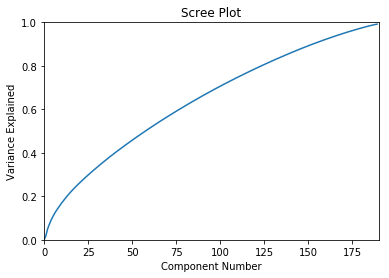

In [17]:
plt.plot([sum(variance_explained[:i]) for i in range(len(variance_explained))])
plt.title('Scree Plot')
plt.xlim([0, len(variance_explained)])
plt.xlabel('Component Number')
plt.ylim([0, 1])
plt.ylabel('Variance Explained')
plt.show()

### 140 features suffice to achieve 86% of variance explained.

In [15]:
# We'' go with reducing the feature space from 8820 to 140.
svd= TruncatedSVD(140)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

# Clustering

### Let's try clustering by author to see if the data break out into clear recognizable clusters.

In [57]:
X_train.head()

,content,author,author_cat
258,’’ ’amazon ceo jeff bezos just published his a...,Matt Rosoff,5
44,"in a normal convention season, most politician...",Jennifer Steinhauer,4
286,’ ’ ’ intel issued a for its fitness wat...,Alexei Oreskovic,0
129,trade unions representing the army and the pol...,Sarkis Zeronian,7
233,’gopro shares are tanking more than 20% after ...,Alexei Oreskovic,0


## We'll try clustering using K-Means first.

In [16]:
from sklearn.cluster import KMeans

# initialize the algorithm
km = KMeans(n_clusters = 10, random_state=10) 

# fit and predict the clusters of the training set
y_pred_km = km.fit_predict(X_train_lsa)

In [17]:
c=np.array(X_train['author_cat'])

In [18]:
c.reshape(-1,1)

array([[5],
       [4],
       [0],
       [7],
       [0],
       [3],
       [8],
       [2],
       [4],
       [0],
       [9],
       [3],
       [2],
       [5],
       [0],
       [9],
       [2],
       [7],
       [0],
       [9],
       [9],
       [1],
       [3],
       [8],
       [3],
       [4],
       [3],
       [7],
       [0],
       [8],
       [9],
       [6],
       [7],
       [1],
       [6],
       [3],
       [3],
       [8],
       [5],
       [8],
       [1],
       [6],
       [1],
       [4],
       [3],
       [5],
       [4],
       [2],
       [3],
       [4],
       [6],
       [7],
       [8],
       [0],
       [8],
       [6],
       [5],
       [5],
       [2],
       [8],
       [3],
       [6],
       [4],
       [4],
       [7],
       [1],
       [7],
       [4],
       [1],
       [8],
       [4],
       [6],
       [6],
       [9],
       [4],
       [5],
       [1],
       [5],
       [8],
       [7],
       [5],
       [4],
       [1],
    

## Let's plot the results of the K-Means Clustering using the first 2 LSA components and coloring by author category.

Text(0.5,1,'KMeans Clustering of The Training Set \n Into Ten Clusters')

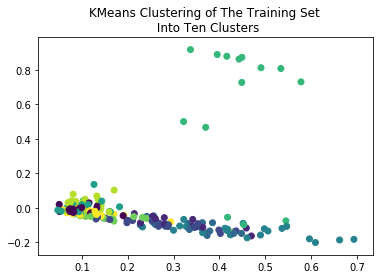

In [19]:
plt.scatter(X_train_lsa[:, 0], X_train_lsa[:, 1], c=c)
plt.title('KMeans Clustering of The Training Set \n Into Ten Clusters')

In [20]:
pd.crosstab(y_pred_km, c)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,0,3,0,1,0,1,1,13,0,7
1,0,0,0,0,21,0,2,0,0,0
2,0,0,0,0,0,0,11,0,0,0
3,11,0,0,0,0,4,0,0,6,1
4,3,0,1,0,0,7,0,0,0,1
5,5,0,0,0,0,6,0,0,8,2
6,0,13,4,4,1,0,1,0,0,1
7,0,2,0,15,0,0,0,1,0,9
8,0,1,14,1,0,0,0,2,0,0


### Cross tabulation shows that K-means clustering does a good job in separating the articles into roughly 10 author clusters.  Let's check with other clustering algorithms.

# Mean-shift Clustering

Number of estimated clusters: 1


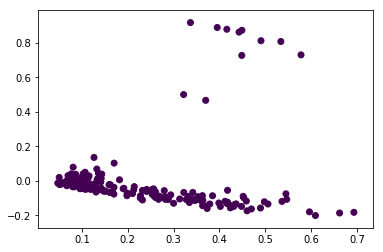

In [22]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train_lsa, quantile=0.05)

#Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding = False)
ms.fit(X_train_lsa)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Count your clusters
n_clusters_ = len(np.unique(labels))

print('Number of estimated clusters: {}'.format(n_clusters_))

plt.scatter(X_train_lsa[:,0], X_train_lsa[:,1], c = labels)
plt.show()

### Mean-shift clustering is limited in that it only recognizes one cluster, no matter what we use for quantile percentage.

# Spectral Clustering

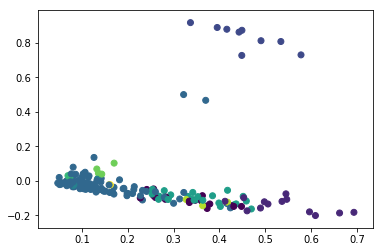

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,0,0,0,18,0,0,0,1,0,0
1,0,0,0,0,11,0,2,0,0,0
2,0,0,0,0,0,0,9,0,0,0
3,18,9,8,1,7,17,3,15,15,21
4,3,0,0,0,0,0,0,0,1,0
5,0,10,11,2,1,0,1,0,0,1
6,0,0,0,0,0,0,0,0,2,0
7,0,0,0,0,0,1,0,0,3,0
8,0,0,0,0,3,0,0,0,0,0


In [23]:
from sklearn.cluster import SpectralClustering

# We know we're looking for 10 clusters.
n_clusters=10

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train_lsa)

# Predicted clusters
predict = sc.fit_predict(X_train_lsa)

#Graph results.
plt.scatter(X_train_lsa[:,0], X_train_lsa[:,1], c = predict)
plt.show()

pd.crosstab(predict, c)

### Spectral clustering doesn't perform as well as K-Means Clustering and groups a majority of articles into one cluster.

# Affinity Propogation

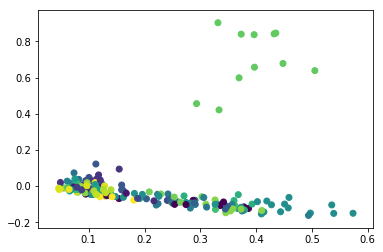

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,0,0,6,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,3,0,0
2,3,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,3,0
4,0,1,0,0,0,0,0,3,0,1
5,1,0,0,0,0,1,0,0,3,0
6,2,0,0,0,0,2,0,0,2,0
7,0,0,2,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,2,0


In [59]:
af = AffinityPropagation()
af.fit(X_train_lsa)

# Extract cluster assignments for each data point.
labels = af.labels_

plt.scatter(X_train_lsa[:,0], X_train_lsa[:,1], c = labels)
plt.show()

pd.crosstab(labels, c)

### Affinity propogation performs poorly in that it tries to separate the articles into 34 clusters.  This could be due to the articles having different writing styles based on theme of articles, with about 3-4 styles per author.

## Conclusion

### As we can see, K-Means Clustering performs the best in separating the articles into the 10 known author categories.    While challenging to see all the clusters distinctly in the 2D plot after LSA, cross tabulation shows how well the algorithm performs.